In [12]:
import pandas as pd
import json
import seaborn as sns

In [6]:
taxes = pd.read_json('https://query.data.world/s/sklfpspe5frv4kgoi757numesnwlvl')
taxes.describe()
taxes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166686 entries, 0 to 166685
Data columns (total 12 columns):
A00100      166686 non-null int64
A02300      166686 non-null int64
A02500      166686 non-null int64
A04800      166686 non-null int64
A18300      166686 non-null int64
MARS2       166686 non-null int64
MARS4       166686 non-null int64
NUMDEP      166686 non-null int64
STATE       166686 non-null object
agi_stub    166686 non-null int64
mars1       166686 non-null int64
zipcode     166686 non-null int64
dtypes: int64(11), object(1)
memory usage: 15.3+ MB


In [7]:
taxes.head()

,A00100,A02300,A02500,A04800,A18300,MARS2,MARS4,NUMDEP,STATE,agi_stub,mars1,zipcode
0,11004990,97553,64407,1830923,72527,115070,240450,548630,AL,1,481840,0
1,17658446,52682,560917,8618302,240950,150290,125560,375670,AL,2,200750,0
2,15963943,27490,882812,10205184,329474,142970,34070,186770,AL,3,75820,0
3,14294375,16508,793454,10045399,361954,125410,10390,133020,AL,4,26730,0
4,27387096,17488,1038902,21014718,982577,177070,5860,185150,AL,5,18990,0


In [10]:
taxes = taxes.rename({"A00100":"AGI", "A02300":"UnempComp", "A02500":"TaxSS", "A04800":"TaxInc", "A18300":"TaxPaid", "MARS2":"Joint", "MARS4":"HoH", "NUMDEP":"Dep", "STATE":"ST", "agi_stub":"agiBucket", 'mars1':'Single', 'zipcode':'zip'}, axis = 'columns')
taxes.head()

,AGI,UnempComp,TaxSS,TaxInc,TaxPaid,Joint,HoH,Dep,ST,agiBucket,Single,zip
0,11004990,97553,64407,1830923,72527,115070,240450,548630,AL,1,481840,0
1,17658446,52682,560917,8618302,240950,150290,125560,375670,AL,2,200750,0
2,15963943,27490,882812,10205184,329474,142970,34070,186770,AL,3,75820,0
3,14294375,16508,793454,10045399,361954,125410,10390,133020,AL,4,26730,0
4,27387096,17488,1038902,21014718,982577,177070,5860,185150,AL,5,18990,0


Let's see what the highest amount of each type of filer in a county was by state.

In [20]:
taxes['Joint', 'Single', 'HoH'].max()

,Joint,Single,HoH
ST,,,
AK,45560,92660,12950
AL,177070,481840,240450
AR,107370,296760,123560
AZ,248430,671120,235280
CA,1611640,4292060,1104160
CO,286100,603680,118460
CT,216000,420380,87580
DC,18760,67060,24670
DE,48540,107870,28730


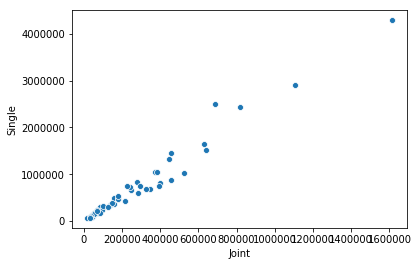

In [22]:
sns.scatterplot(x = 'Joint', y = 'Single', data = taxes['Joint', 'Single', 'HoH'].max())